# Chess.com Data Overview

## Objective

This notebook conducts an initial exploration of all available datasets. It includes examining the structure and summary statistics of each table, analyzing individual columns, and identifying potential relationships and influencing factors for key metrics.

# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Import all datasets to be analyzed

In [5]:
leaders = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/chesscom_all_leaders.csv')
details = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/top_players_detailed_info.csv')
games_09_25 = pd.read_csv('/Users/olhahaidash/Library/Mobile Documents/com~apple~CloudDocs/ohlayadash/[02] Робота/[01] Проєкти — активні й завершені проєкти/chesscom_data_analysis/0_chesscom_api_csv/all_players_games_2025_09_flat.csv')

2. Examined dataset structure and content, identified and handled duplicates, missing, and irrelevant values during data cleaning.

## Leaders table

In [7]:
leaders

,type,rank,username,score,country
0,live_blitz,1,MagnusCarlsen,3333,https://api.chess.com/pub/country/NO
1,live_blitz,2,Hikaru,3299,https://api.chess.com/pub/country/US
2,live_blitz,3,DenLaz,3260,https://api.chess.com/pub/country/BY
3,live_blitz,4,nihalsarin,3244,https://api.chess.com/pub/country/IN
4,live_blitz,5,LyonBeast,3241,https://api.chess.com/pub/country/FR
...,...,...,...,...,...
195,daily,46,AndersNM,2336,https://api.chess.com/pub/country/NO
196,daily,47,AndreyKubatko,2335,https://api.chess.com/pub/country/RU
197,daily,48,Razzeldazzel,2334,https://api.chess.com/pub/country/SE
198,daily,49,roughest,2333,https://api.chess.com/pub/country/BR


In [6]:
leaders['type'].unique()

array(['live_blitz', 'live_bullet', 'live_rapid', 'daily'], dtype=object)

The Leaders table contains information about the top 50 players in the rankings for different types of chess activities on the Chess.com platform.

Columns:

`type` — the type of activity to which the ranking belongs. It can take one of four values: 'live_blitz', 'live_bullet', 'live_rapid', 'daily'. These values correspond to game formats with different time controls.

`rank` — the player’s position in the respective ranking (an integer from 1 to 50).

`username` — the unique username of a player on Chess.com. The same username may appear multiple times if a player is ranked in the top 50 for several different activity types.

`score` — the number of points earned by the player in a specific activity.

`country` — a URL indicating the player’s country, for example: https://api.chess.com/pub/country/NO. The last two letters (NO) represent the country code according to the ISO 3166-1 alpha-2 standard.

In [9]:
leaders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      200 non-null    object
 1   rank      200 non-null    int64 
 2   username  200 non-null    object
 3   score     200 non-null    int64 
 4   country   200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [10]:
leaders.describe(include = 'all')

,type,rank,username,score,country
count,200,200.000000,200,200.000000,200
unique,4,NaN,159,NaN,57
top,live_blitz,NaN,MagnusCarlsen,NaN,https://api.chess.com/pub/country/US
freq,50,NaN,3,NaN,42
mean,NaN,25.500000,NaN,2875.820000,NaN
std,NaN,14.467083,NaN,330.760822,NaN
min,NaN,1.000000,NaN,2332.000000,NaN
25%,NaN,13.000000,NaN,2658.500000,NaN
50%,NaN,25.500000,NaN,3034.000000,NaN
75%,NaN,38.000000,NaN,3155.250000,NaN


In [27]:
unique_leaders_us = leaders.loc[leaders['country'] == 'https://api.chess.com/pub/country/US', 'username'].nunique()
print(unique_leaders_us)


35


The table contains 200 records and 5 columns: two numerical (rank and score) and three categorical (type, username, country). There are no missing values, which allows for a complete analysis without additional data cleaning.

The username column contains 159 unique players, indicating that some players appear in multiple activities. The most frequently appearing player is MagnusCarlsen, represented in 3 out of 4 activities.

The country column includes 57 unique countries. The largest number of leaders come from the USA — 42 records, corresponding to 35 unique players (≈22% of all unique players).

Quartile analysis shows that the distribution is asymmetric and skewed toward higher values: the interval between Q1 and Q2 (3034 − 2658.5 = 375.5) is considerably larger than that between Q2 and Q3 (3155.25 − 3034 = 121.25), indicating a clustering of players with high scores.

### Analysis of Score Distribution by Activity Type

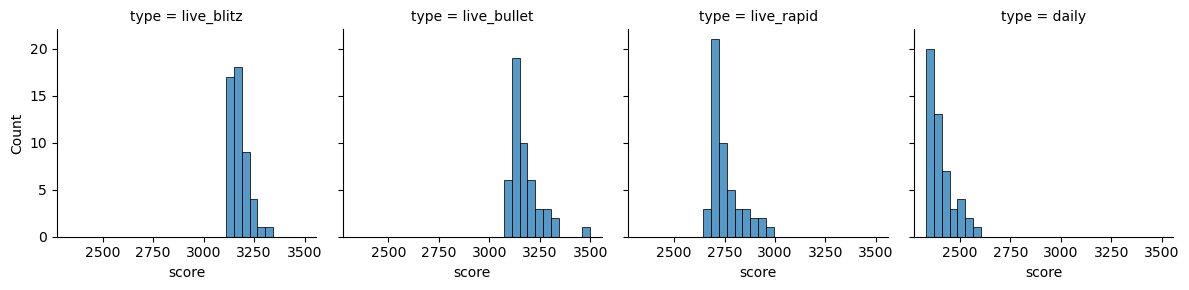

In [69]:
a = sns.displot(
    data=leaders,
    x='score',
    bins=30,
    col='type',
    height=3,
    aspect=1
)

g.fig.suptitle('Distribution of Scores by Activity Type', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.88)

g.set_axis_labels("Score", "Count")

plt.show()

The overall distribution of scores among the leaders is clustered and right-skewed (positive skewed), with a pronounced concentration of players in the 3100–3200 range for live_blitz and live_bullet, around 2650-2700 for live_rapid, and 2300–2350 for daily. The type of activity has a significant impact on the score distribution, as the spread and shape of the distribution vary depending on the category. This can be explained by the specific rules of each activity, particularly the duration of a single game (ranging from 1 minute to 1 day). Since fewer leaders participate in rapid and daily games, they accordingly accumulate fewer points in these categories.

<Axes: xlabel='type', ylabel='score'>

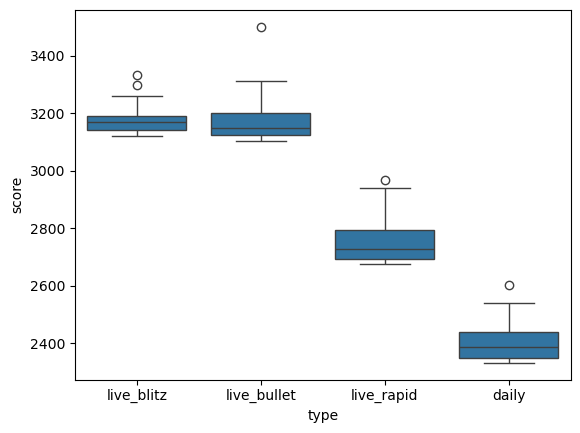

In [9]:
sns.boxplot(data = leaders, x = 'type', y = 'score')

In [10]:
leaders.groupby('type')['score'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
daily,50.0,2402.14,65.907793,2332.0,2348.25,2386.0,2438.00,2603.0
live_blitz,50.0,3174.86,45.246720,3122.0,3141.50,3170.5,3191.50,3333.0
live_bullet,50.0,3174.16,74.692119,3102.0,3123.00,3149.5,3201.75,3500.0
live_rapid,50.0,2752.12,75.499058,2677.0,2693.25,2727.0,2795.25,2966.0


The boxplot chart illustrates the distribution of the score indicator across four types of player activity — live_bullet, live_blitz, live_rapid, and daily.
This visualization enables comparison of performance levels within each group, assessment of value variability, and identification of key distribution patterns.

### Median
Comparing the medians shows that the highest typical scores are observed in live_blitz (3170.5) and live_bullet (3149.5), which are nearly identical — around 3200.
They are followed by live_rapid (2727.0) and daily (2386.0).

Thus, the highest typical performance is observed in live_blitz and live_bullet, while the lowest is in daily.

### Interquartile Range (IQR)
The spread of values is relatively consistent across all activity types. The lowest variability is seen in live_blitz, indicating a stable performance level among players.
The highest variability is observed in live_rapid (IQR ≈ 102), suggesting considerable differences in player skill levels within this category.

### Minimum and Maximum Values
All boxplots exhibit a similar shape of the upper “whisker,” which extends noticeably further than the lower one, indicating the presence of players with exceptionally high scores.
The lower whiskers are shorter and more uniform, meaning the lower range of scores is stable across all activity types.
The highest maximum value is found in live_bullet (3500), while the lowest maximum belongs to daily (2603).

### Outliers
Each activity type shows a few outliers with very high scores, indicating the presence of top-performing players who significantly exceed the typical level.
No outliers are observed among the lower values.

### Distribution Skewness
For live_bullet and live_rapid, the median is shifted toward the lower edge of the box, indicating positive (right) skewness — most players have high scores, while a few lower results pull the distribution to the right.
In contrast, live_blitz and daily show nearly centered medians, indicating a symmetric distribution with no noticeable skewness.

### Summary Conclusion
The analysis of boxplots and descriptive statistics shows that:

* The highest scores and lowest variability are found in live_blitz and live_bullet (mean ≈ 3174, std = 45–75), indicating stable and strong player performance in fast game formats.

* The live_rapid format shows a wider spread of scores (std = 75.5), reflecting greater diversity in player performance levels.

* The daily format has the lowest mean (2402) and median (2386), which may suggest lower competitiveness or difficulty among players in this category.

Overall, live_blitz and live_bullet can be considered the formats with the highest and most consistent performance, while live_rapid and daily are characterized by lower average scores and greater variability.



## Categorical Data Analysis

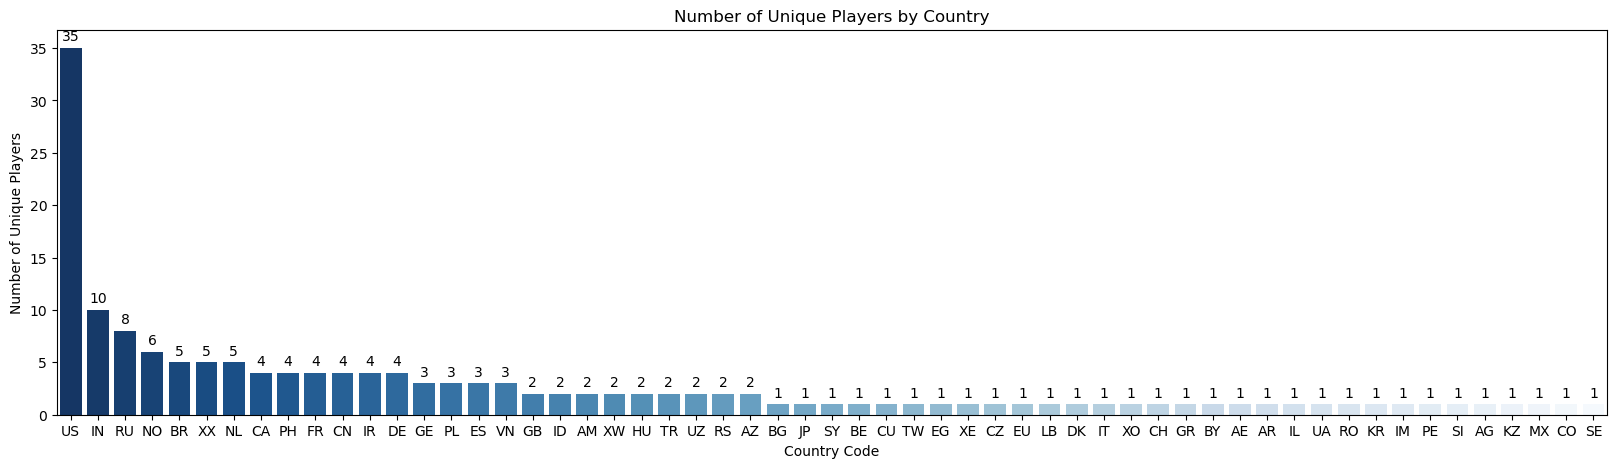

In [17]:
leaders['country_code'] = leaders['country'].str[-2:]

unique_players = leaders[['username', 'country_code']].drop_duplicates()

country_counts = unique_players['country_code'].value_counts().reset_index()
country_counts.columns = ['country_code', 'unique_players']

plt.figure(figsize=(20,5))
ax = sns.barplot(data=country_counts, x='country_code', y='unique_players', palette='Blues_r', hue = 'country_code')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Number of Unique Players by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Unique Players')
plt.show()

The chart shows the distribution of unique players by country.
The largest number of top players comes from the United States — 35 players, significantly exceeding the counts of other countries.
Following the US are India with 10 players, Russia with 8 players, and Norway with 6 players.
All other countries have between 1 and 5 representatives, indicating a notable concentration of top players in a few main countries.

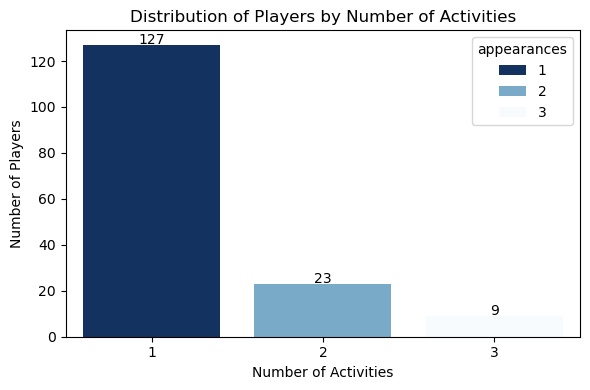

In [26]:
player_counts = leaders['username'].value_counts().reset_index()
player_counts.columns = ['username', 'appearances']

distribution = player_counts['appearances'].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=distribution.index, y=distribution.values, palette="Blues_r", hue = distribution.index)

plt.title('Distribution of Players by Number of Activities')
plt.xlabel('Number of Activities')
plt.ylabel('Number of Players')

for i, v in enumerate(distribution.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()

In [23]:
player_table = player_counts.sort_values('appearances', ascending=False)

player_table.reset_index(drop=True, inplace=True)
player_table.head(9)

,username,appearances
0,MagnusCarlsen,3
1,nihalsarin,3
2,LyonBeast,3
3,rpragchess,3
4,Firouzja2003,3
5,Hikaru,3
6,GHANDEEVAM2003,3
7,FairChess_on_YouTube,3
8,DenLaz,3


The distribution of players shows that the majority, 127 players, participate in only one type of activity, while 23 players engage in two types, and 9 players are active across three types of activities.

Additionally, a separate table lists the players who participate in three out of four activity types, highlighting the most versatile members of the dataset.

There are no players who participate in all four activity types.